In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Cargar los datos desde un archivo CSV
df_dummies = pd.read_csv('C:/Users/ljgov/Documents/LABORATORIA/PROYECTO4//dummies.csv')

In [4]:
# Verificar los primeros registros del DataFrame original
print(df_dummies.head())
print(df_dummies.info())
print(df_dummies.describe())

                                        review_title  \
0  **UPDATE MARCH2021**Decent for a USB 2.0 Devic...   
1  Mediocre,Best in Budget and Beast in Quality,B...   
2  Decent Product at about right price.,Seems goo...   
3  They did what they said... Sent a replacement ...   
4  Excellent Phone in the budget segment,Best val...   

                              cleaned_review_content  adjusted_rating  \
0  This is the Update MARCHI want to make a huge ...              4.3   
1  Recieved damaged product the first time the se...              4.1   
2  I bought this powerbank to use during my vacat...              4.1   
3  nd purchase reviewPurchased on July dash charg...              3.9   
4  I was looking for a phone below K I am not a p...              4.1   

   product_id  dummie_positive_title  dummie_negative_title  \
0  B098K3H92Z                      0                      1   
1  B07KY3FNQP                      1                      0   
2  B07RD611Z8                      

In [7]:
import pandas as pd

# Verificar si hay valores NaN en el DataFrame
nan_values = df_dummies.isna().sum()

# Mostrar las columnas con valores NaN y la cantidad de valores NaN en cada una
if nan_values.sum() == 0:
    print("No hay valores NaN en el DataFrame.")
else:
    print("Columnas con valores NaN y su cantidad:")
    print(nan_values[nan_values > 0])

# Alternativamente, para ver solo las filas que contienen NaN
rows_with_nan = df_dummies[df_dummies.isna().any(axis=1)]
if rows_with_nan.empty:
    print("No hay filas con valores NaN.")
else:
    print("\nFilas que contienen NaN:")
    print(rows_with_nan)

No hay valores NaN en el DataFrame.
No hay filas con valores NaN.


In [8]:
df = df_dummies.copy()

Valores NaN después de la conversión:
total_positive_count       0
avg_adjusted_rating     1351
dtype: int64
Número de filas después de manejar NaN: 1351
                                        review_title  \
0  **UPDATE MARCH2021**Decent for a USB 2.0 Devic...   
1  Mediocre,Best in Budget and Beast in Quality,B...   
2  Decent Product at about right price.,Seems goo...   
3  They did what they said... Sent a replacement ...   
4  Excellent Phone in the budget segment,Best val...   

                              cleaned_review_content  adjusted_rating  \
0  This is the Update MARCHI want to make a huge ...              4.3   
1  Recieved damaged product the first time the se...              4.1   
2  I bought this powerbank to use during my vacat...              4.1   
3  nd purchase reviewPurchased on July dash charg...              3.9   
4  I was looking for a phone below K I am not a p...              4.1   

   product_id  dummie_positive_title  dummie_negative_title  \
0  B098

C:\Users\ljgov\AppData\Local\Temp\ipykernel_23244\1279232362.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_positive_count'].fillna(0, inplace=True)
C:\Users\ljgov\AppData\Local\Temp\ipykernel_23244\1279232362.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

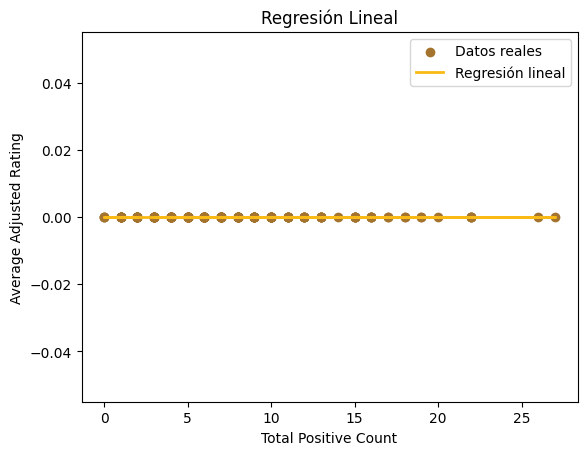

In [9]:
# Convertir a numérico manejando errores y verificando conversiones
df['total_positive_count'] = pd.to_numeric(df['total_positive_count'].replace({',': ''}, regex=True), errors='coerce')
df['avg_adjusted_rating'] = pd.to_numeric(df['avg_adjusted_rating'].replace({',': '', '.': ''}, regex=True), errors='coerce')

# Verificar el número de NaN en cada columna después de la conversión
print("Valores NaN después de la conversión:")
print(df[['total_positive_count', 'avg_adjusted_rating']].isna().sum())

# Llenar valores NaN con algún valor (ej. 0) si es apropiado
df['total_positive_count'].fillna(0, inplace=True)
df['avg_adjusted_rating'].fillna(0, inplace=True)

# Verificar el número de filas después de manejar NaN
print("Número de filas después de manejar NaN:", df.shape[0])

# Verificar los primeros registros después de la limpieza
print(df.head())

# Seleccionar las columnas para la regresión
X = df[['total_positive_count']]  # Variables independientes
y = df['avg_adjusted_rating']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Visualizar la regresión
plt.scatter(X_test, y_test, color='#a4742e', label='Datos reales')  
plt.plot(X_test, y_pred, color='#f9ba15', linewidth=2, label='Regresión lineal')  
plt.xlabel('Total Positive Count')
plt.ylabel('Average Adjusted Rating')
plt.title('Regresión Lineal')
plt.legend()
plt.show()
